
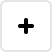
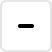
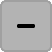
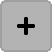
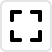
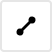
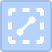
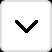
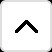
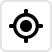

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
from ipywidgets import widgets
from IPython.display import display

flavors = ["default", "darcula", "solarized_light", "solarized_dark","high_contrast_light", "high_contrast_dark"]

dropdown_flavors = widgets.Dropdown(options = flavors, description = "Theme flavor:")

In [3]:
from IPython.display import Javascript, display

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Run all with flavor")
button.on_click(run_all)


In [4]:
def withFlavor():
    if (dropdown_flavors.value == "darcula"):
        return flavor_darcula()
    if (dropdown_flavors.value == "solarized_light"):
        return flavor_solarized_light()
    if (dropdown_flavors.value == "solarized_dark"):
        return flavor_solarized_dark()
    if (dropdown_flavors.value == "high_contrast_light"):
        return flavor_high_contrast_light()
    if (dropdown_flavors.value == "high_contrast_dark"):
        return flavor_high_contrast_dark()
    return theme()

def show(p):
    return p + ggsize(450, 300) + withFlavor()

### Data

In [5]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')

class_df = mpg_df.groupby('class').hwy.agg(['min', 'median', 'max', 'count']).reset_index()

In [6]:
from scipy.stats import multivariate_normal
def generate_random_data(size=50, mean=[0, 0], cov=[[1, .5], [.5, 1]], seed=42):
    np.random.seed(seed)
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = multivariate_normal(mean, cov).pdf(np.dstack((X, Y)))
    return pd.DataFrame({'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()})

random_df = generate_random_data()

In [7]:
midwest_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')
pop_df = midwest_df.groupby('state').poptotal.sum().to_frame('population').reset_index()

from lets_plot.geo_data import *
states_df = geocode('state', pop_df.state, scope='US').get_boundaries(9)

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


###  ↓ Run all with selected flavor   ↓

In [9]:
display(dropdown_flavors)
display(button)

<IPython.core.display.Javascript object>

Dropdown(description='Theme flavor:', index=1, options=('default', 'darcula', 'solarized_light', 'solarized_da…

Button(description='Run all with flavor', style=ButtonStyle())

### Geoms

In [10]:
# POINT

show(
    ggplot(mpg_df, aes('cty', 'hwy')) + geom_point()
)

In [11]:
# POINT + shape

show(
    ggplot(mpg_df, aes('cty', 'hwy')) + geom_point(shape=22)
)

In [12]:
# JITTER

show( ggplot(mpg_df, aes('fl', 'drv')) + geom_jitter() )

In [13]:
# PATH

t = np.linspace(0, 2 * np.pi, 100)
show(
    ggplot({'x': t * np.sin(t), 'y': t * np.cos(t)}, aes(x='x', y='y')) + geom_path()
)

In [14]:
# LINE

x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
y = np.sin(x)

show( ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_line() )

In [15]:
# SEGMENT

show( ggplot() + geom_segment(x=0, y=0, xend=1, yend=1, arrow=arrow()) )

In [16]:
# ABLINE

show( ggplot() + geom_abline(slope=.5))

In [17]:
# HLINE

show( ggplot() + geom_hline(yintercept=0) )

In [18]:
# VLINE 

show( ggplot() + geom_vline(xintercept=0) )

In [19]:
# CONTOUR

show( ggplot(random_df, aes('x', 'y')) + geom_contour(aes(z='z')) )

In [20]:
# DENSITY2D

show( ggplot(mpg_df, aes('cty', 'hwy')) + geom_density2d() )

In [21]:
# FREQPOLY

show( ggplot(mpg_df, aes(x='hwy')) + geom_freqpoly() )

In [22]:
# STEP

show( ggplot(mpg_df, aes(x='hwy')) + geom_step(aes(y='..count..'), stat='bin') )

In [23]:
# DENSITY

show( ggplot(mpg_df, aes(x='hwy')) + geom_density() )

In [24]:
# SMOOTH

np.random.seed(42)
n = 50
x = np.arange(n)
y = x + np.random.normal(scale=10, size=n)
show(
    ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_smooth() 
)

In [25]:
# LOLLIPOP

show(
    ggplot({
        'x': [-3, -2, -1, 0, 1, 2, 3],
        'y': [2, 3, -2, 3, -1, 0, 4],
    }, aes('x', 'y')) + geom_lollipop()
) 

In [26]:
# DOT_PLOT

show( ggplot(mpg_df, aes(x='hwy')) + geom_dotplot() )

In [27]:
# Y_DOT_PLOT

show(
    ggplot(mpg_df, aes('class', 'hwy')) + geom_ydotplot()
)

In [28]:
# BAR

show( ggplot(mpg_df, aes('hwy')) + geom_bar() )

In [29]:
# HISTOGRAM

show( ggplot(mpg_df, aes(x='hwy')) + geom_histogram() )

In [30]:
# PIE

show(
    ggplot({'name': ['a', 'b', 'c'], 'value': [40, 90, 10]}) + 
    geom_pie(aes(slice='value'), stat='identity')
)

In [31]:
# BIN_2D

show( ggplot(mpg_df, aes('cty', 'hwy')) + geom_bin2d() )

In [32]:
# TILE

show( ggplot(mpg_df, aes('cty', 'hwy')) + geom_tile() )

In [33]:
# RASTER

show( ggplot(random_df, aes('x', 'y')) + geom_raster() )

In [34]:
# ERROR_BAR

show(
    ggplot(class_df, aes(x='class')) + geom_errorbar(aes(ymin='min', ymax='max'))
)

In [35]:
# CROSSBAR

show(
    ggplot(class_df, aes(x='class')) + geom_crossbar(aes(ymin='min', middle='median', ymax='max'))
)

In [36]:
# LINERANGE

show( ggplot(class_df, aes(x='class')) + geom_linerange(aes(ymin='min', ymax='max')) )

In [37]:
# POINTRANGE 

show(
    ggplot(class_df, aes(x='class')) + geom_pointrange(aes(ymin='min', y='median', ymax='max')) 
)

In [38]:
# BOXPLOT

show( ggplot(mpg_df, aes('class', 'hwy')) +  geom_boxplot() )

In [39]:
# VIOLIN 

show( ggplot(mpg_df, aes('class', 'hwy')) + geom_violin() )

In [40]:
# AREA_RIDGE

show( ggplot(mpg_df, aes('hwy', 'class')) + geom_area_ridges() )

In [41]:
# AREA

show( ggplot(mpg_df, aes(x='hwy')) + geom_area(stat='bin') )

In [42]:
# CONTOURF

show( ggplot(random_df, aes('x', 'y')) + geom_contourf(aes(z='z')) )

In [43]:
# POLYGON

show( ggplot() + geom_polygon(data=states_df) )

In [44]:
# RECT

show( ggplot() + geom_rect(xmin=-1, xmax=1, ymin=-1, ymax=1) )

In [45]:
# RIBBON

n = 10
np.random.seed(42)
x = np.arange(n)
ymin = np.random.randint(-5, 0, size=n)
ymax = np.random.randint(1, 6, size=n)
show(
    ggplot({'x': x, 'ymin': ymin, 'ymax': ymax}, aes(x='x')) + geom_ribbon(aes(ymin='ymin', ymax='ymax'))
)

In [46]:
# DENSITY2DF

show( ggplot(mpg_df, aes('cty', 'hwy')) + geom_density2df() )

In [47]:
# MAP

show( ggplot() + geom_map(data=states_df) )

In [48]:
# TEXT

show( ggplot() + geom_text(x=0, y=0, label='Lorem ipsum'))
#ggplot(mpg_df, aes('cty', 'hwy')) + geom_text(aes(label='fl'))

In [49]:
# LABEL

show( ggplot() + geom_label(x=0, y=0, label='Lorem ipsum') )
#ggplot(mpg_df, aes('cty', 'hwy')) + geom_label(aes(label='fl'))

In [50]:
# QQ

show( ggplot(mpg_df, aes(sample='hwy')) + geom_qq() )

In [51]:
# QQ2

show( ggplot(mpg_df, aes(x='cty', y='hwy')) + geom_qq2() )

In [52]:
# QQ_LINE

show( ggplot(mpg_df, aes(sample='hwy')) + geom_qq_line() )

In [53]:
# QQ2_LINE

show( ggplot(mpg_df, aes(x='cty', y='hwy')) + geom_qq2_line() )